   Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0   1          60       RL           65     8450   Pave    NaN      Reg   
1   2          20       RL           80     9600   Pave    NaN      Reg   
2   3          60       RL           68    11250   Pave    NaN      IR1   
3   4          70       RL           60     9550   Pave    NaN      IR1   
4   5          60       RL           84    14260   Pave    NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008       

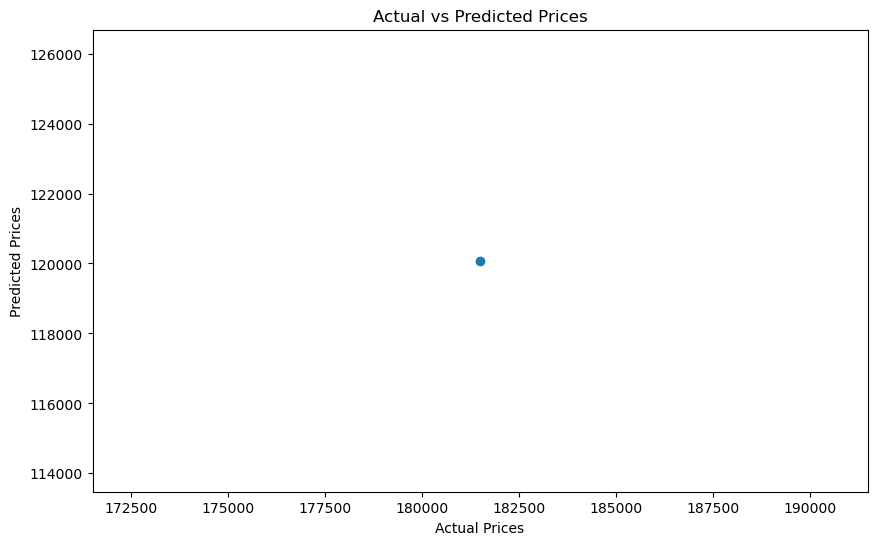

               Coefficient
GrLivArea       197.368421
BedroomAbvGr -54815.789474
FullBath      69881.578947


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
print(data.head())

# Select relevant features
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']

# Check for missing values
print(features.isnull().sum())

# Handle missing values by filling with mean (if any)
features = features.fillna(features.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the relationship between actual and predicted prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coefficients)


First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0   1          60       RL           65     8450   Pave    NaN      Reg   
1   2          20       RL           80     9600   Pave    NaN      Reg   
2   3          60       RL           68    11250   Pave    NaN      IR1   
3   4          70       RL           60     9550   Pave    NaN      IR1   
4   5          60       RL           84    14260   Pave    NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditi

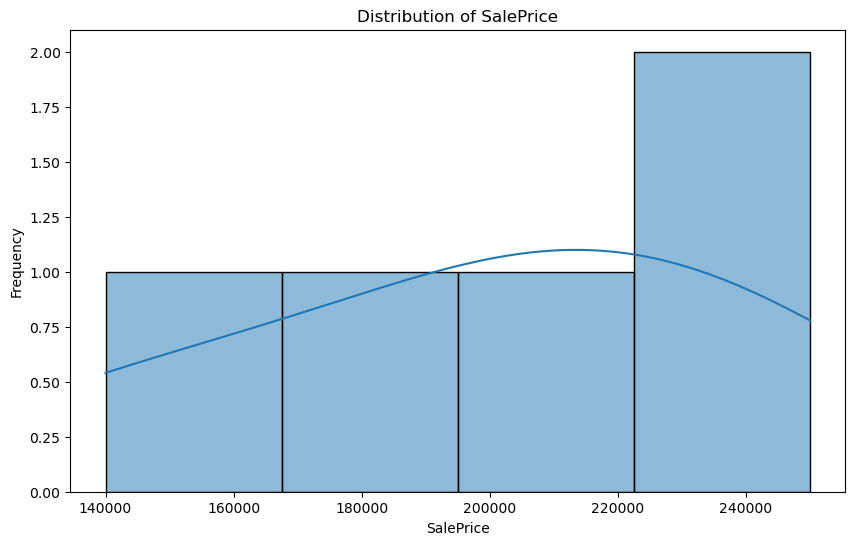

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(data.head())

# Get an overview of the dataset
print("\nDataset info:")
print(data.info())

# Summarize the numerical features
print("\nSummary statistics of numerical features:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Correlation of selected features with SalePrice:
SalePrice       1.000000
FullBath        0.807438
BedroomAbvGr    0.655794
GrLivArea       0.608130
Name: SalePrice, dtype: float64


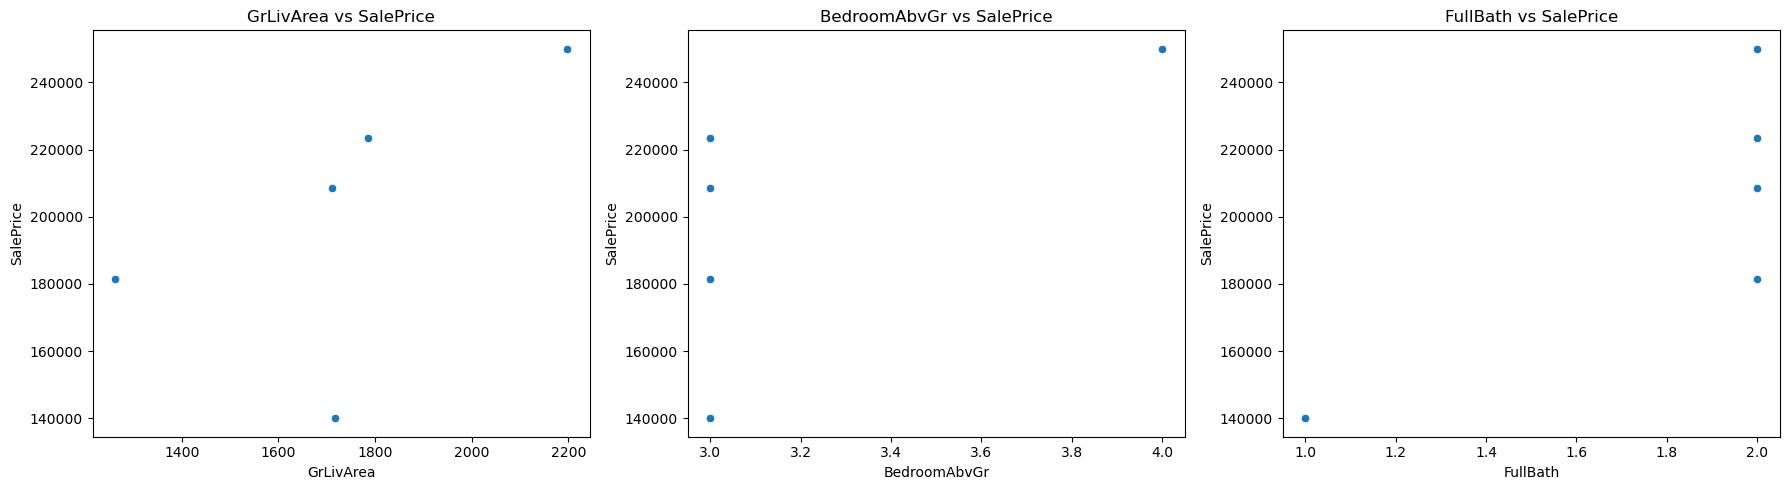

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Calculate correlation with the target variable
correlation = data[selected_features + [target]].corr()
print("Correlation of selected features with SalePrice:")
print(correlation[target].sort_values(ascending=False))

# Visualize relationships with scatter plots
plt.figure(figsize=(18, 5))

for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[feature], y=data[target])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Check for missing values in selected features and target
missing_values = data[selected_features + [target]].isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Handle missing values by filling with the mean (for numerical features)
data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

# Verify that there are no missing values left in the selected features
missing_values_after = data[selected_features + [target]].isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)


Missing values before handling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64

Missing values after handling:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by filling with the mean (if any)
data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

# Split the data into features and target
X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (4, 3)
Testing features shape: (1, 3)
Training target shape: (4,)
Testing target shape: (1,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by filling with the mean (if any)
data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

# Split the data into features and target
X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the relationship between actual and predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 3772545706.4288425
R^2 Score: nan


/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


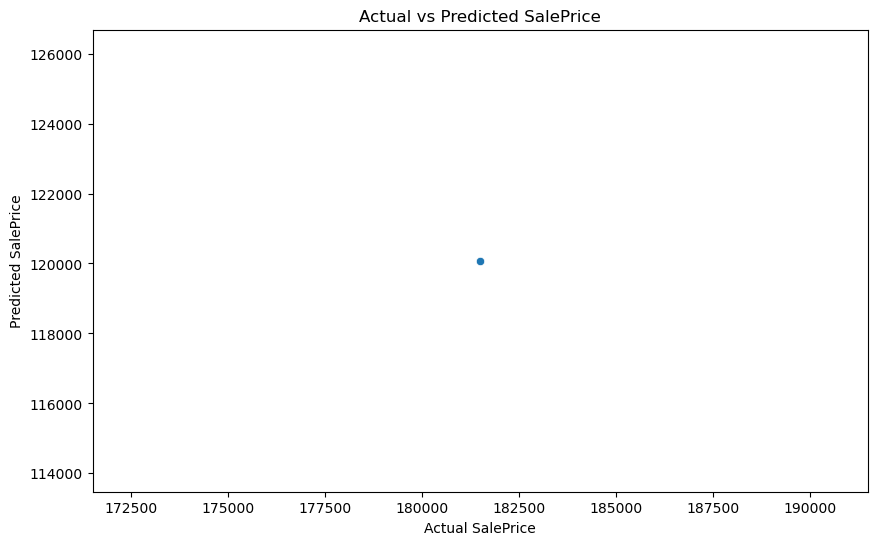

               Coefficient
GrLivArea       197.368421
BedroomAbvGr -54815.789474
FullBath      69881.578947


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by filling with the mean (if any)
data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

# Split the data into features and target
X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the relationship between actual and predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 3772545706.4288425
R^2 Score: nan


/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


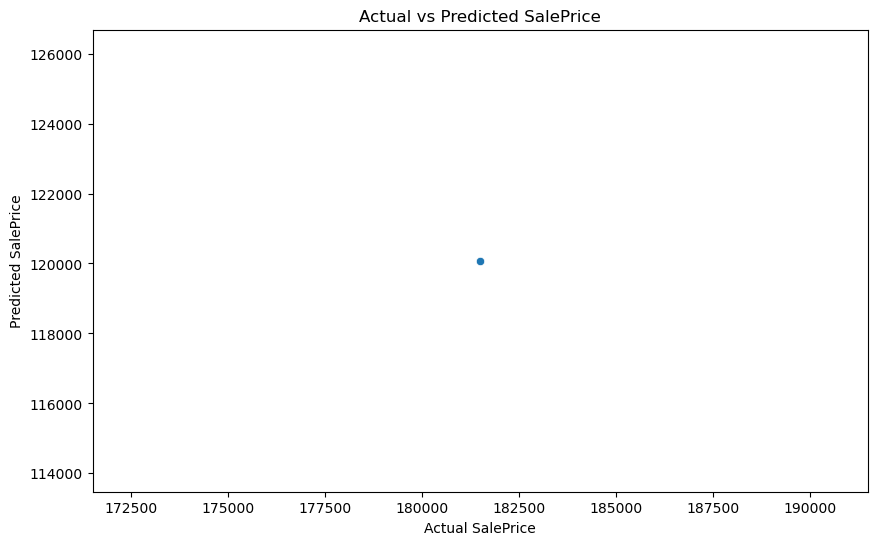

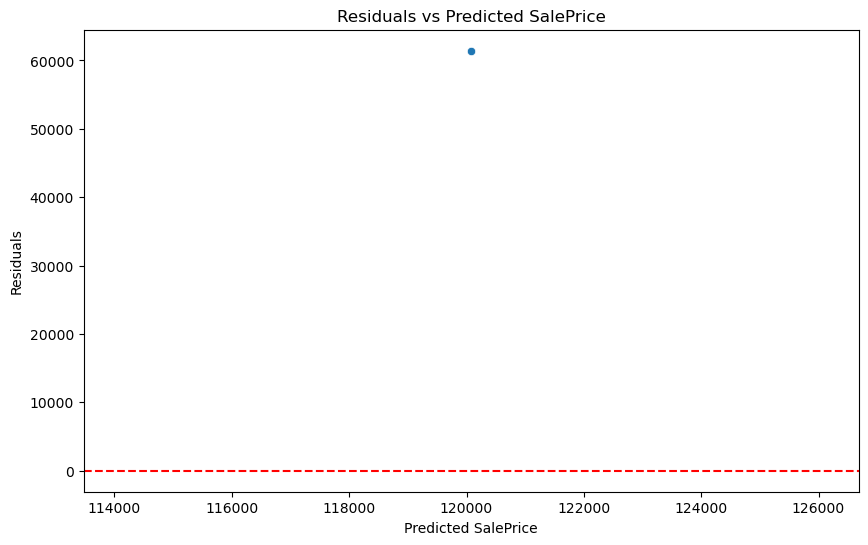

               Coefficient
GrLivArea       197.368421
BedroomAbvGr -54815.789474
FullBath      69881.578947


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Initial feature selection
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Handle missing values by filling with the mean (if any)
data[selected_features] = data[selected_features].fillna(data[selected_features].mean())

# Split the data into features and target
X = data[selected_features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the relationship between actual and predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted SalePrice')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coefficients)
